# **Conexão com postgres e Relatórios do Sistema**

**Importando bibliotecas de acesso ao postgres, manipulação de dados e gráficos**


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

**Usando o psycopg2 para configurar conexão**

In [ ]:
conn = psycopg2.connect(host = "kashin.db.elephantsql.com", database = "udelhnwy", user = "udelhnwy", password = "XD1Cbv1phrgq9OmqtFNs_nRGYiIUfWSn")


# **Relatórios**
<br>

**Relatório 1**

Objetivo: Acessar a lista de usuários, imprimir nick e a idade.
<br><br>


*Código para obtenção do resultado:*


In [ ]:
res = pd.read_sql_query("""
    SELECT nome, idade FROM usuario order by idade
    """,conn)

res

,nome,idade
0,Monark56,14
1,KimetS2,15
2,Ash34ley,15
3,76Aspt,16
4,Kosh2,17
5,Goku88,18
6,Henk32,19


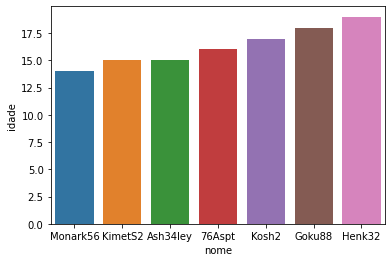

In [ ]:
sns.barplot(x = 'nome', y = 'idade', data = res)

<br><br><br><br>

**Relatório 2**

Objetivo: Acessar a página principal, exibir o conteúdo recomendado e as interações do usuário.
<br><br>


*Código para obtenção do resultado:*

In [ ]:
res = pd.read_sql_query("""
    SELECT conteudos, Interacoes FROM home
    """,conn)

res

,conteudos,interacoes
0,"Bleach, Naruto, One Piece","Augusto, ""e ai cara"""
1,"Boku no hero, Tokio Ghoul","Goku88, ""discordo de vc"""
2,"Naruto, Dragon Ball, Bleach","88Paula, ""tudo bem?"""
3,"Naruto, Tokio Ghoul, Sword Art Online","GABriel, ""desculpa"""


<br><br><br><br>

**Relatório 3**

Objetivo: Exibir o usuário, o comentário feito e interações(apenas exibe se tiver likes).
<br><br>


*Código para obtenção do resultado:*

In [ ]:
res = pd.read_sql_query("""
    SELECT usuario, texto, likes FROM usercomment where likes > 0 order by likes
    """,conn)

res

,usuario,texto,likes
0,Poly776,Tava ansioso pra quando lançasse,1
1,Mark3,Mais algume vendo em 2021?,7
2,239842Sat,Qualidade caiu mt,34


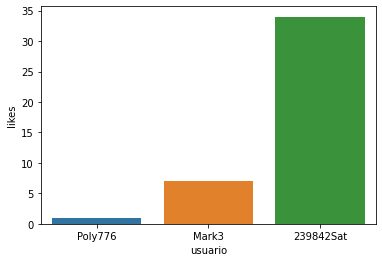

In [ ]:
sns.barplot(x = 'usuario', y = 'likes', data = res)

<br><br><br><br>

**Relatório 4**

Objetivo: Mostrar o nome do conteúdo, tipo e classificação.
<br><br>


*Código para obtenção do resultado:*

In [ ]:
res = pd.read_sql_query("""
    SELECT nome, tipo, Classificacao FROM conteudo
    """,conn)

res

,nome,tipo,classificacao
0,Boku no Hero,FIlme,12
1,Bleach,Anime,14
2,Dragon Ball,Live-Action,10
3,One Piece,Anime,0
4,Naruto,OVA,0


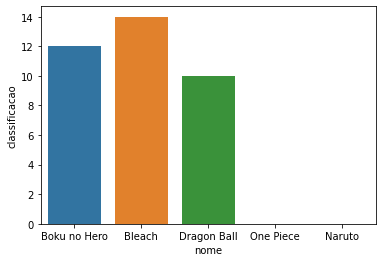

In [ ]:
sns.barplot(x = 'nome', y = 'classificacao', data = res)

<br><br><br><br>

**Relatório 5**

Objetivo: Exibir as mensagens enviadas pelos usuários, o remetente e se a mensagem foi visualizada.
<br><br>


*Código para obtenção do resultado(SIstema binário, 1 significa visualizado e 0 não visualizado):*

In [ ]:
res = pd.read_sql_query("""
    SELECT Mensagem, Remetente, VIsualizada FROM mensagem;

    """,conn)

res

,mensagem,remetente,visualizada
0,Quer assistir mais tarde?,Alex33,1
1,Não achei aqui,Party65,0
2,Talvez mais tarde,GOku88,1
3,Gostei muito,O33nyx,1


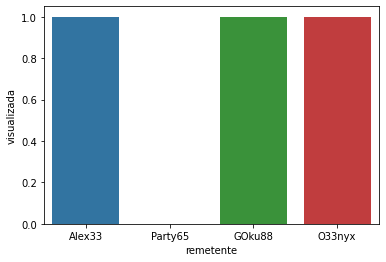

In [ ]:
sns.barplot(x = 'remetente', y = 'visualizada', data = res)

In [ ]:
conn.close()